In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np

### Import MNIST, Train/Test Split

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)

### Data Visualization

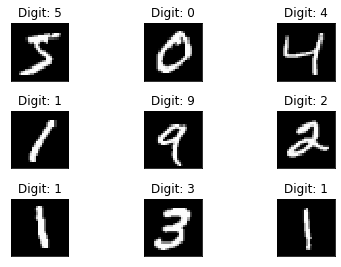

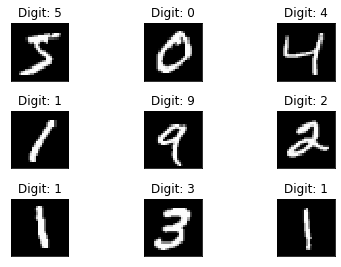

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [38]:
x_train[0].shape

(28, 28)

### Normalization and Reshaping

Notice that `x_train[0]` has values ranging from 0 to 255, so we need to normalize.

In [47]:
x_train = x_train / 255
x_test = x_test / 255

Keras requires 3D inputs, so need to reshape from `(28, 28)` to `(28, 28, 1)`.

In [48]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

# Check that dimensions of each input is (28, 28, 1)
x_train[0].shape

(28, 28, 1)

### Build Model

In [1]:
# Hyperparameters
#filters = 8
#filter_size = 3


CNN = keras.Sequential()

## Conv 1
CNN.add(Conv2D(8, kernel_size=3, activation="relu", input_shape=x_train[0].shape)) # try other powers of 2?
# pooling
CNN.add(MaxPooling2D(pool_size=2))

# conv 2
CNN.add(Conv2D(8), 3, activation="relu")
# pooling
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Flatten()) # need to flatten input so it can go through dense layer
CNN.add(Dense(10, activation="softmax")) # digits 0-9

CNN.compile(loss="categorical_crossentropy", # categorical_crossentropy
            optimizer="adam",
            metrics=["accuracy"])

NameError: name 'keras' is not defined

### Training

In [76]:
CNN.fit(x_train, 
        to_categorical(y_train, 10), # to_categorical reshapes labels to fit into the 10 categories
        epochs=3, 
        batch_size=32,
        validation_data=(x_test, to_categorical(y_test))
        )

Epoch 1/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3240 - accuracy: 0.9096 - val_loss: 0.1644 - val_accuracy: 0.9518
Epoch 2/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1353 - accuracy: 0.9613 - val_loss: 0.1036 - val_accuracy: 0.9700
Epoch 3/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0935 - accuracy: 0.9728 - val_loss: 0.0783 - val_accuracy: 0.9754
